In [59]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

In [109]:
height = 32
width = 64
channel = 3

In [110]:
clean_data_path = 'D:\\intern\\classified_data\\clean_data\\extra_clean'
noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB'
noisy_20dB_path = 'D:\\intern\\classified_data\\noisy_data\\20dB\\extra_20dB'
noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB'
noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB'
noisy_100dB_path = 'D:\\intern\\classified_data\\noisy_data\\100dB\\extra_100dB'

In [111]:
clean_data_files = os.listdir(clean_data_path)
noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
noisy_25dB_files = os.listdir(noisy_25dB_path)
noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)

In [112]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)

In [113]:
n=0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1742.43it/s]


In [114]:
n=0
for i in tqdm(noisy_15dB_files):
    img = cv2.imread(noisy_15dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_15dB[n] = img
    n = n+1

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1736.36it/s]


In [115]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1655.88it/s]


In [116]:
n=0
for i in tqdm(noisy_25dB_files):
    img = cv2.imread(noisy_25dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_25dB[n] = img
    n = n+1

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1666.86it/s]


In [117]:
n=0
for i in tqdm(noisy_30dB_files):
    img = cv2.imread(noisy_30dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_30dB[n] = img
    n = n+1

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1628.80it/s]


In [118]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1811.86it/s]


In [119]:
clean_data.shape

(500, 32, 64, 3)

In [120]:
model = Sequential([
    
  # encoder
    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu    
])

In [121]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 32, 64, 64)        1792      
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 32, 64, 64)        36928     
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 64, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 32, 64)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 16, 32, 32)        18464     
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 16, 32, 32)        9248      
_________________________________________________________________
batch_normalization_27 (Batc (None, 16, 32, 32)       

In [122]:
early_stop = EarlyStopping(
                monitor='val_loss',
                patience=10, #n of epochs with no improvement which will be stopped training
                verbose=1
            )

log_csv = CSVLogger('logs_100dB.csv',
                   separator=',',
                   append=False
                   )

tensorboard = TensorBoard(
                log_dir='logs_100dB'
            )

# callbacks_list = [early_stop, log_csv, tensorboard]

In [123]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [124]:
history = model.fit(noisy_100dB, clean_data,
          validation_split=0.2,
          batch_size=8,
          epochs=100,
          #callbacks=callbacks_list
        )

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 17s 42ms/sample - loss: 1.5569 - accuracy: 0.3059 - val_loss: 1.7119 - val_accuracy: 0.7647
Epoch 2/100
400/400 [==============================] - 15s 36ms/sample - loss: 1.5569 - accuracy: 0.3170 - val_loss: 1.7119 - val_accuracy: 0.0290
Epoch 3/100
400/400 [==============================] - 14s 36ms/sample - loss: 1.5569 - accuracy: 0.3011 - val_loss: 1.7119 - val_accuracy: 0.0615
Epoch 4/100
400/400 [==============================] - 14s 34ms/sample - loss: 1.5569 - accuracy: 0.3046 - val_loss: 1.7119 - val_accuracy: 0.2613
Epoch 5/100
400/400 [==============================] - 14s 34ms/sample - loss: 1.5569 - accuracy: 0.3182 - val_loss: 1.7119 - val_accuracy: 0.5340
Epoch 6/100
400/400 [==============================] - 14s 35ms/sample - loss: 1.5569 - accuracy: 0.3461 - val_loss: 1.7119 - val_accuracy: 0.7232
Epoch 7/100
400/400 [==============================] - 15s 37ms/sample -

400/400 [==============================] - 14s 36ms/sample - loss: 1.5569 - accuracy: 0.4756 - val_loss: 1.7119 - val_accuracy: 0.0046
Epoch 57/100
400/400 [==============================] - 14s 36ms/sample - loss: 1.5569 - accuracy: 0.4769 - val_loss: 1.7119 - val_accuracy: 0.9929
Epoch 58/100
400/400 [==============================] - 14s 36ms/sample - loss: 1.5569 - accuracy: 0.3789 - val_loss: 1.7119 - val_accuracy: 0.9923
Epoch 59/100
400/400 [==============================] - 14s 36ms/sample - loss: 1.5569 - accuracy: 0.4735 - val_loss: 1.7119 - val_accuracy: 0.0044
Epoch 60/100
400/400 [==============================] - 16s 39ms/sample - loss: 1.5569 - accuracy: 0.4191 - val_loss: 1.7119 - val_accuracy: 0.9920
Epoch 61/100
400/400 [==============================] - 15s 38ms/sample - loss: 1.5569 - accuracy: 0.4358 - val_loss: 1.7119 - val_accuracy: 0.9920
Epoch 62/100
400/400 [==============================] - 15s 36ms/sample - loss: 1.5569 - accuracy: 0.3986 - val_loss: 1.7119 

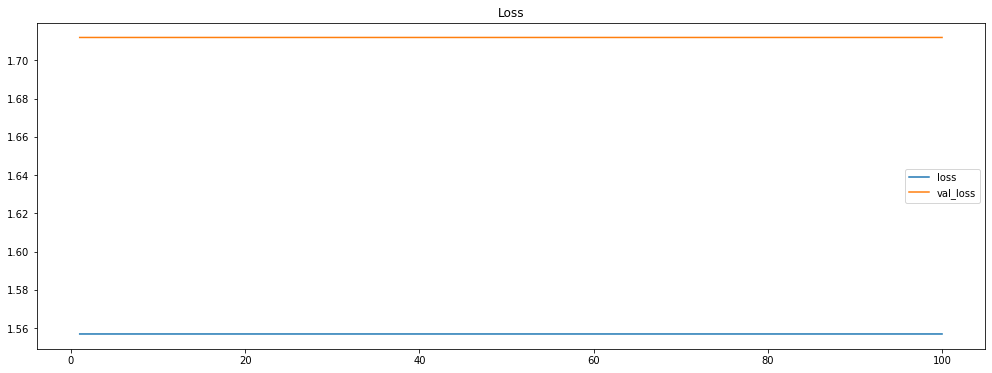

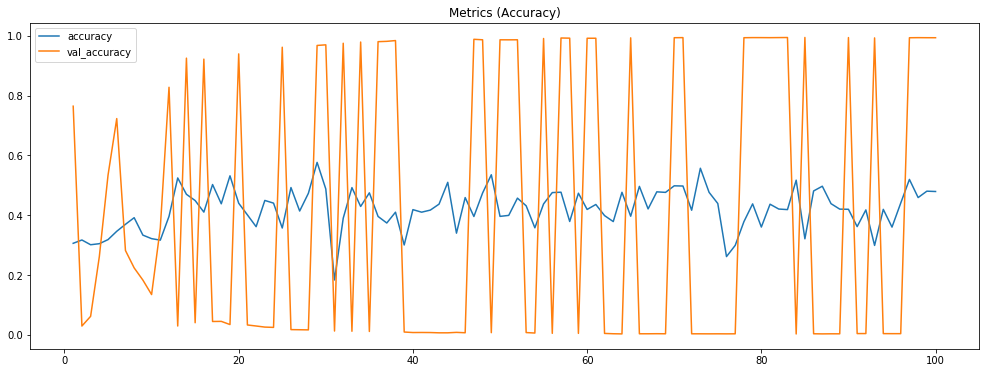

In [125]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [126]:
decoded_15dB = model.predict(noisy_15dB)
decoded_20dB = model.predict(noisy_20dB)
decoded_25dB = model.predict(noisy_25dB)
decoded_30dB = model.predict(noisy_30dB)

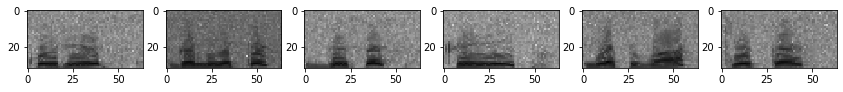

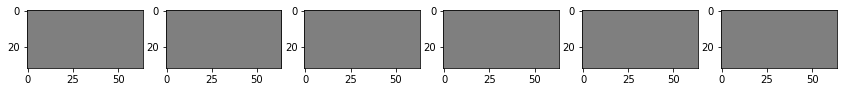

In [127]:
# Displaying prediction images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_20dB[i])
plt.show()

# Displaying prediction_train images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(decoded_20dB[i])
plt.show()

In [128]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [129]:
print(f'15dB PSNR mean: {PSNR(noisy_15dB, decoded_15dB)}')

for i in range(len(noisy_15dB)):
    
    value = PSNR(noisy_15dB[i], decoded_15dB[i]) 
    print(f"PSNR value is {value} dB")

15dB PSNR mean: 66.98010058820076
PSNR value is 66.79057068826837 dB
PSNR value is 66.14971618599367 dB
PSNR value is 66.63848532559304 dB
PSNR value is 67.752473170853 dB
PSNR value is 66.98625057976807 dB
PSNR value is 64.96645999418587 dB
PSNR value is 67.33963864498318 dB
PSNR value is 67.90520198613126 dB
PSNR value is 66.29879476301653 dB
PSNR value is 65.72563232680885 dB
PSNR value is 67.50327730421468 dB
PSNR value is 65.65505810898046 dB
PSNR value is 65.43494225510474 dB
PSNR value is 66.55005790139191 dB
PSNR value is 67.5493806832682 dB
PSNR value is 67.1316726565222 dB
PSNR value is 67.57168577385161 dB
PSNR value is 67.56256864714713 dB
PSNR value is 64.28710327551623 dB
PSNR value is 66.06959619724891 dB
PSNR value is 66.83427520126929 dB
PSNR value is 66.26803270157448 dB
PSNR value is 65.96152293367055 dB
PSNR value is 65.93419178874967 dB
PSNR value is 67.6232538863156 dB
PSNR value is 66.3787920606095 dB
PSNR value is 67.58307948100394 dB
PSNR value is 68.3806028800

In [130]:
print(f'20dB PSNR mean: {PSNR(noisy_20dB, decoded_20dB)}')

for i in range(len(noisy_20dB)):
    
    value = PSNR(noisy_20dB[i], decoded_20dB[i]) 
    print(f"PSNR value is {value} dB")

20dB PSNR mean: 66.5040492394819
PSNR value is 66.98773379348103 dB
PSNR value is 66.57480087565898 dB
PSNR value is 64.01559448249868 dB
PSNR value is 67.3413558710792 dB
PSNR value is 66.10964768054723 dB
PSNR value is 65.43521751679651 dB
PSNR value is 66.70486975150699 dB
PSNR value is 67.44391464070746 dB
PSNR value is 65.49247425237637 dB
PSNR value is 65.14507948000785 dB
PSNR value is 66.96402244422349 dB
PSNR value is 65.09572525334879 dB
PSNR value is 65.28030614469965 dB
PSNR value is 65.69259457323797 dB
PSNR value is 67.2996328850462 dB
PSNR value is 66.5242713837494 dB
PSNR value is 67.03324609267759 dB
PSNR value is 66.89039338046435 dB
PSNR value is 65.95381589196207 dB
PSNR value is 66.51901731449051 dB
PSNR value is 66.20782687465808 dB
PSNR value is 65.50872934999165 dB
PSNR value is 65.49739587697184 dB
PSNR value is 65.62918123745808 dB
PSNR value is 67.04935885902533 dB
PSNR value is 66.05076327474183 dB
PSNR value is 67.01519212099201 dB
PSNR value is 67.50305502

PSNR value is 66.54259411975221 dB
PSNR value is 66.86466769314856 dB
PSNR value is 65.56763132194989 dB
PSNR value is 66.41367174150399 dB
PSNR value is 65.67553631170364 dB
PSNR value is 66.08493043815456 dB
PSNR value is 67.66188668065051 dB
PSNR value is 66.24758353006754 dB
PSNR value is 66.5500460965936 dB
PSNR value is 66.68973484108456 dB
PSNR value is 64.55425886431476 dB
PSNR value is 66.20451790342172 dB
PSNR value is 66.85278879953337 dB
PSNR value is 65.4708966069964 dB
PSNR value is 67.06531515566314 dB
PSNR value is 68.09004036717832 dB
PSNR value is 66.26366307211131 dB
PSNR value is 66.2360359111246 dB
PSNR value is 67.25494642905088 dB
PSNR value is 68.18661992403217 dB
PSNR value is 65.25648509614436 dB
PSNR value is 65.80754794136884 dB
PSNR value is 66.03611327032722 dB
PSNR value is 66.5131837465588 dB
PSNR value is 65.0278022918343 dB
PSNR value is 65.88437003343543 dB
PSNR value is 66.77311365023962 dB
PSNR value is 66.47790472529141 dB
PSNR value is 65.81372016

In [131]:
print(f'25dB PSNR mean: {PSNR(noisy_25dB, decoded_25dB)}')

for i in range(len(noisy_25dB)):
    
    value = PSNR(noisy_25dB[i], decoded_25dB[i]) 
    print(f"PSNR value is {value} dB")

25dB PSNR mean: 65.7753139409625
PSNR value is 65.51965791864659 dB
PSNR value is 65.86113102676883 dB
PSNR value is 65.61918689967315 dB
PSNR value is 66.65245060107787 dB
PSNR value is 65.33463942792287 dB
PSNR value is 64.87439494702194 dB
PSNR value is 65.9029052152073 dB
PSNR value is 66.74806993670813 dB
PSNR value is 64.58374064422253 dB
PSNR value is 64.6098106405103 dB
PSNR value is 66.29287220337781 dB
PSNR value is 64.4927463198001 dB
PSNR value is 64.17574481639984 dB
PSNR value is 65.20319281679097 dB
PSNR value is 65.94112817033185 dB
PSNR value is 66.05319972663952 dB
PSNR value is 66.16000458358664 dB
PSNR value is 65.84874765790465 dB
PSNR value is 62.89358077106727 dB
PSNR value is 65.94366323993879 dB
PSNR value is 65.5779219036245 dB
PSNR value is 64.43126107214403 dB
PSNR value is 64.73111894113897 dB
PSNR value is 65.29297597914709 dB
PSNR value is 65.88553964405186 dB
PSNR value is 65.25314354576167 dB
PSNR value is 66.30118866337129 dB
PSNR value is 66.015433140

PSNR value is 67.34848795217812 dB
PSNR value is 66.26931009125309 dB
PSNR value is 64.95193432039122 dB
PSNR value is 67.06584179737027 dB
PSNR value is 67.40395935261921 dB
PSNR value is 65.20687240775187 dB
PSNR value is 65.39329328030081 dB
PSNR value is 65.40822721413677 dB
PSNR value is 67.55165860894121 dB
PSNR value is 65.3319267933388 dB
PSNR value is 67.88645675138034 dB
PSNR value is 67.58370026689606 dB
PSNR value is 66.39096426211819 dB
PSNR value is 64.9635600987792 dB
PSNR value is 67.54808035610878 dB
PSNR value is 68.307887578691 dB
PSNR value is 66.75436904214885 dB
PSNR value is 67.02146911163565 dB
PSNR value is 65.97203190088545 dB
PSNR value is 65.1459252237636 dB
PSNR value is 66.04785445519069 dB
PSNR value is 65.89947957987826 dB
PSNR value is 65.87739460582756 dB
PSNR value is 66.13710837865354 dB
PSNR value is 66.22531016041192 dB
PSNR value is 65.57431208242542 dB
PSNR value is 66.19683647241006 dB
PSNR value is 66.88770886085544 dB
PSNR value is 64.95527654

In [132]:
print(f'30dB PSNR mean: {PSNR(noisy_30dB, decoded_30dB)}')

for i in range(len(noisy_30dB)):
    
    value = PSNR(noisy_30dB[i], decoded_30dB[i]) 
    print(f"PSNR value is {value} dB")

30dB PSNR mean: 65.05855561307114
PSNR value is 65.4878165681834 dB
PSNR value is 65.13653325021583 dB
PSNR value is 65.17229448157462 dB
PSNR value is 66.02267833583662 dB
PSNR value is 65.0566436776831 dB
PSNR value is 64.28645433002907 dB
PSNR value is 65.27125120168031 dB
PSNR value is 66.34254741664178 dB
PSNR value is 64.3498524975034 dB
PSNR value is 63.98906501949334 dB
PSNR value is 65.65010907635323 dB
PSNR value is 63.9778902165577 dB
PSNR value is 63.20146367754869 dB
PSNR value is 64.52391138082406 dB
PSNR value is 65.87446052696365 dB
PSNR value is 65.65538473774649 dB
PSNR value is 65.53534192285512 dB
PSNR value is 65.6595905615603 dB
PSNR value is 64.52037705879617 dB
PSNR value is 64.86057269903787 dB
PSNR value is 64.98352193813653 dB
PSNR value is 64.06249671334052 dB
PSNR value is 63.97877855356401 dB
PSNR value is 64.1935196295948 dB
PSNR value is 64.98860994879261 dB
PSNR value is 64.76963788560282 dB
PSNR value is 65.29440627724657 dB
PSNR value is 66.4569305634

PSNR value is 64.8279590494383 dB
PSNR value is 64.06876741351194 dB
PSNR value is 64.40395623046999 dB
PSNR value is 63.81368642486205 dB
PSNR value is 64.79824914385973 dB
PSNR value is 65.71072544790678 dB
PSNR value is 64.74080174978849 dB
PSNR value is 66.34146769978592 dB
PSNR value is 65.85243842549792 dB
PSNR value is 65.62384236965856 dB
PSNR value is 65.21272278205808 dB
PSNR value is 65.19939771683208 dB
PSNR value is 64.11421903156325 dB
PSNR value is 64.1711656941684 dB
PSNR value is 64.02552413795024 dB
PSNR value is 64.88351887083648 dB
PSNR value is 64.84978977341855 dB
PSNR value is 65.16418890815099 dB
PSNR value is 64.70316702471499 dB
PSNR value is 64.75810314256405 dB
PSNR value is 65.23509031113909 dB
PSNR value is 65.60741526894179 dB
PSNR value is 63.52696296635787 dB
PSNR value is 64.91862301893623 dB
PSNR value is 64.93189334810081 dB
PSNR value is 63.86408624953709 dB
PSNR value is 65.7114538909236 dB
PSNR value is 66.25551631885968 dB
PSNR value is 64.319525

In [133]:
print(f'100dB PSNR mean: {PSNR(noisy_100dB, decoded_100dB)}')

for i in range(len(noisy_100dB)):
    
    value = PSNR(noisy_100dB[i], decoded_100dB[i]) 
    print(f"PSNR value is {value} dB")

ValueError: operands could not be broadcast together with shapes (500,32,64,3) (500,64,128,3) 